In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall
import tensorflow as tf
tf.random.set_seed(
    42
)


import seaborn as sns

tf_chkpt_path = 'tf_leNet_checkpoints/'

In [4]:
from src.helperFunctions import display_model_trainTestGraphs

# Training Set

In [5]:
# Normalizing data for 8 bit
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'images/train/',
    target_size = (227,227),
    batch_size=225,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 48979 images belonging to 8 classes.


# Validation Set

In [6]:
# Normalizing data for 8 bit
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    'images/val/',
    target_size = (227,227),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 14175 images belonging to 8 classes.


# Test Set

In [7]:
# Normalizing data for 8 bit
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'images/test/',
    target_size = (227,227),
    batch_size=8,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 1793 images belonging to 8 classes.


# Modeling

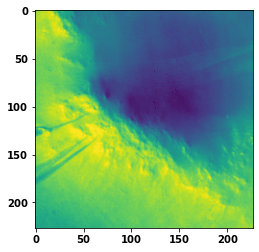

In [8]:
plt.imshow(test_generator[0][0][0])

In [9]:
early_stop = EarlyStopping(monitor='val_loss', 
                           min_delta=1e-8,
                           verbose=1,
                           patience = 5,
                           restore_best_weights=True,
                           mode='min')

# Model - LeNet - 5 - All tanh activations

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 227, 227, 6)       156       
                                                                 
 average_pooling2d (AverageP  (None, 113, 113, 6)      0         
 ooling2D)                                                       
                                                                 
 activation (Activation)     (None, 113, 113, 6)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 54, 54, 16)       0         
 ePooling2D)                                                     
                                                                 
 activation_1 (Activation)   (None, 54, 54, 16)        0

Epoch 29/30
218/218 [==============================] - 35s 160ms/step - loss: 0.0941 - accuracy: 0.9810 - precision: 0.9844 - recall: 0.9768 - val_loss: 0.8695 - val_accuracy: 0.7894 - val_precision: 0.8041 - val_recall: 0.7740
Epoch 30/30
218/218 [==============================] - 35s 162ms/step - loss: 0.0877 - accuracy: 0.9829 - precision: 0.9861 - recall: 0.9789 - val_loss: 0.8822 - val_accuracy: 0.7733 - val_precision: 0.7927 - val_recall: 0.7525


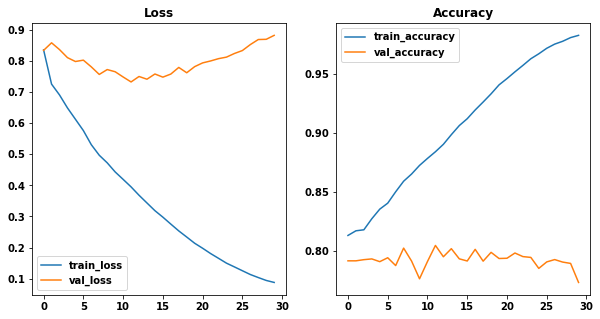

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=5, activation='tanh', padding='same',strides=1,
                        input_shape=(227, 227, 1)))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('tanh'))
model.add(layers.Conv2D(filters=16, kernel_size=5, activation='tanh', padding='valid',strides=1,))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('tanh'))
model.add(layers.Conv2D(filters=120, kernel_size=5, activation='tanh', padding='valid',strides=1,))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(8, activation='softmax'))


model.compile(optimizer = optimizers.Adam(learning_rate=0.0001),
              loss= losses.CategoricalCrossentropy(),
              metrics = ['accuracy', Precision(), Recall()])

model.summary()

results = model.fit(train_generator,
#                     steps_per_epoch=200,  # Number of training samples to pull per epoch
                    epochs=30,  # Number of epochs
                    validation_data=val_generator,
                    validation_freq=1,
#                     validation_steps=200,  # Number of validation samples to run validation on
                    )

display_model_trainTestGraphs(results)

In [11]:
results.model.save(tf_chkpt_path+'Model_1')

INFO:tensorflow:Assets written to: tf_leNet_checkpoints/Model_1\assets


INFO:tensorflow:Assets written to: tf_leNet_checkpoints/Model_1\assets


# Model - LeNet - 5 - Sigmoid between convolutions

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 227, 227, 6)       156       
                                                                 
 average_pooling2d_2 (Averag  (None, 113, 113, 6)      0         
 ePooling2D)                                                     
                                                                 
 activation_2 (Activation)   (None, 113, 113, 6)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 16)      2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 54, 54, 16)       0         
 ePooling2D)                                                     
                                                                 
 activation_3 (Activation)   (None, 54, 54, 16)       

Epoch 28/30
218/218 [==============================] - 35s 162ms/step - loss: 0.7834 - accuracy: 0.8171 - precision_1: 0.8171 - recall_1: 0.8171 - val_loss: 0.8601 - val_accuracy: 0.7916 - val_precision_1: 0.7916 - val_recall_1: 0.7916
Epoch 29/30
218/218 [==============================] - 36s 163ms/step - loss: 0.7834 - accuracy: 0.8171 - precision_1: 0.8171 - recall_1: 0.8171 - val_loss: 0.8637 - val_accuracy: 0.7916 - val_precision_1: 0.7916 - val_recall_1: 0.7916
Epoch 30/30
218/218 [==============================] - 35s 160ms/step - loss: 0.7834 - accuracy: 0.8171 - precision_1: 0.8171 - recall_1: 0.8171 - val_loss: 0.8615 - val_accuracy: 0.7916 - val_precision_1: 0.7916 - val_recall_1: 0.7916


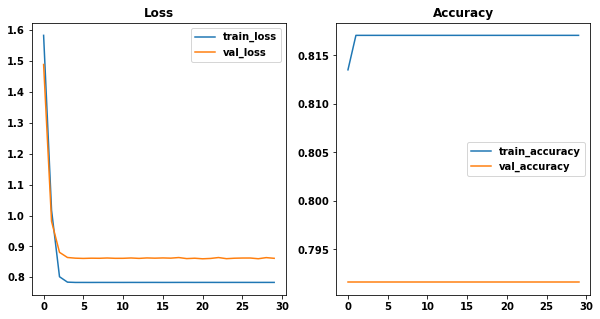

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=5, activation='tanh', padding='same',strides=1,
                        input_shape=(227, 227, 1)))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(filters=16, kernel_size=5, activation='tanh', padding='valid',strides=1,))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(filters=120, kernel_size=5, activation='tanh', padding='valid',strides=1,))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(8, activation='softmax'))


model.compile(optimizer = optimizers.Adam(learning_rate=0.0001),
              loss= losses.CategoricalCrossentropy(),
              metrics = ['accuracy', Precision(), Recall()])

model.summary()

results = model.fit(train_generator,
#                     steps_per_epoch=200,  # Number of training samples to pull per epoch
                    epochs=30,  # Number of epochs
                    validation_data=val_generator,
                    validation_freq=1,
#                     validation_steps=200,  # Number of validation samples to run validation on
                    )

display_model_trainTestGraphs(results)

In [13]:
results.model.save(tf_chkpt_path+'Model_2_sigmoid')

INFO:tensorflow:Assets written to: tf_leNet_checkpoints/Model_2_sigmoid\assets


INFO:tensorflow:Assets written to: tf_leNet_checkpoints/Model_2_sigmoid\assets
